<a href="https://colab.research.google.com/github/Faheemmalla/Machine_Learning/blob/main/LRusingScikitL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression using Scikit-Learn

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=2)

#Load Data(Demo data kyu ki import mai error aaraha)



In [23]:
# Dummy house data
X_train = np.array([
    [2104, 5, 1, 45],
    [1416, 3, 2, 40],
    [852,  2, 1, 35],
    [1940, 4, 2, 30]
])

y_train = np.array([460, 232, 178, 315])

In [24]:
X_features = ['size(sqft)','bedrooms','floors','age']

#Scale/normalize the training data

In [25]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train) #here its normalising basically with the formula x = (x - mean )/ sd
print(X_norm)

[[ 1.07  1.34 -1.    1.34]
 [-0.33 -0.45  1.    0.45]
 [-1.48 -1.34 -1.   -0.45]
 [ 0.74  0.45  1.   -1.34]]


#Create and fit the regression mode

In [26]:
sgdr = SGDRegressor(max_iter = 1500) # model hamara 1000 times iterate karega
#so that it find the best w and b so that error kam hoo
sgdr.fit(X_norm,y_train) # model sab kuch khud calculate karega best w and b nikalne k liye
print(sgdr)
print(sgdr.coef_,sgdr.intercept_) #w_i,b

SGDRegressor(max_iter=1500)
[ 48.12  52.89 -27.93   9.75] [296.15]


In [27]:
w_i = sgdr.coef_
b = sgdr.intercept_
print(w_i,b)


[ 48.12  52.89 -27.93   9.75] [296.15]


#Prediction

In [28]:
y_pred = sgdr.predict(X_norm)
print(y_pred)
#or calculating manually
y_pred = np.dot(X_norm,w_i) + b
print(y_pred)

[459.75 233.02 177.48 314.33]
[459.75 233.02 177.48 314.33]


#plot

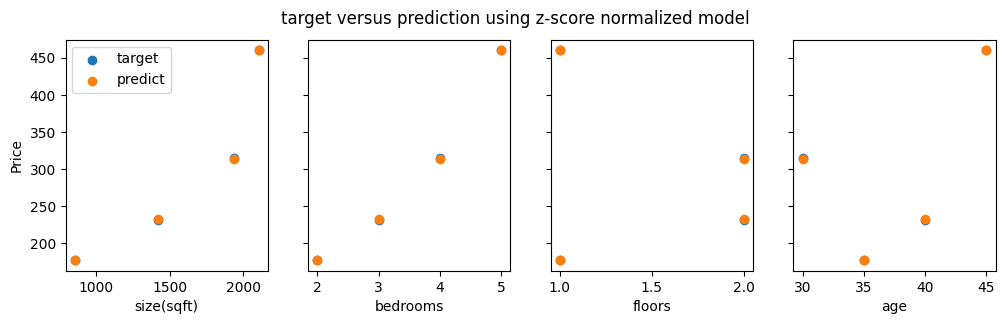

In [29]:
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred, label = 'predict')
ax[0].set_ylabel("Price");
ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()